## Importing Libraries


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import matplotlib.image as Image
import random

## HardCoded Blocks

In [138]:
# substitution table for encryption and key expansion

subsBlock=[0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
	0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
	0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
	0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
	0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
	0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
	0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
	0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
	0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
	0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
	0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
	0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
	0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
	0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
	0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
	0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]

# inverse substitution table for decryption

invSubsBlock=[0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
	0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
	0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
	0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
	0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
	0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
	0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
	0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
	0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
	0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
	0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
	0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
	0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
	0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
	0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
	0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D]

# The matrix used for the MixColumns step during encryption corresponding to the multiplication by 2

mixColMat2=[0x00,0x02,0x04,0x06,0x08,0x0a,0x0c,0x0e,0x10,0x12,0x14,0x16,0x18,0x1a,0x1c,0x1e,
	0x20,0x22,0x24,0x26,0x28,0x2a,0x2c,0x2e,0x30,0x32,0x34,0x36,0x38,0x3a,0x3c,0x3e,
	0x40,0x42,0x44,0x46,0x48,0x4a,0x4c,0x4e,0x50,0x52,0x54,0x56,0x58,0x5a,0x5c,0x5e,
	0x60,0x62,0x64,0x66,0x68,0x6a,0x6c,0x6e,0x70,0x72,0x74,0x76,0x78,0x7a,0x7c,0x7e,
	0x80,0x82,0x84,0x86,0x88,0x8a,0x8c,0x8e,0x90,0x92,0x94,0x96,0x98,0x9a,0x9c,0x9e,
	0xa0,0xa2,0xa4,0xa6,0xa8,0xaa,0xac,0xae,0xb0,0xb2,0xb4,0xb6,0xb8,0xba,0xbc,0xbe,
	0xc0,0xc2,0xc4,0xc6,0xc8,0xca,0xcc,0xce,0xd0,0xd2,0xd4,0xd6,0xd8,0xda,0xdc,0xde,
	0xe0,0xe2,0xe4,0xe6,0xe8,0xea,0xec,0xee,0xf0,0xf2,0xf4,0xf6,0xf8,0xfa,0xfc,0xfe,
	0x1b,0x19,0x1f,0x1d,0x13,0x11,0x17,0x15,0x0b,0x09,0x0f,0x0d,0x03,0x01,0x07,0x05,
	0x3b,0x39,0x3f,0x3d,0x33,0x31,0x37,0x35,0x2b,0x29,0x2f,0x2d,0x23,0x21,0x27,0x25,
	0x5b,0x59,0x5f,0x5d,0x53,0x51,0x57,0x55,0x4b,0x49,0x4f,0x4d,0x43,0x41,0x47,0x45,
	0x7b,0x79,0x7f,0x7d,0x73,0x71,0x77,0x75,0x6b,0x69,0x6f,0x6d,0x63,0x61,0x67,0x65,
	0x9b,0x99,0x9f,0x9d,0x93,0x91,0x97,0x95,0x8b,0x89,0x8f,0x8d,0x83,0x81,0x87,0x85,
	0xbb,0xb9,0xbf,0xbd,0xb3,0xb1,0xb7,0xb5,0xab,0xa9,0xaf,0xad,0xa3,0xa1,0xa7,0xa5,
	0xdb,0xd9,0xdf,0xdd,0xd3,0xd1,0xd7,0xd5,0xcb,0xc9,0xcf,0xcd,0xc3,0xc1,0xc7,0xc5,
	0xfb,0xf9,0xff,0xfd,0xf3,0xf1,0xf7,0xf5,0xeb,0xe9,0xef,0xed,0xe3,0xe1,0xe7,0xe5]

# The matrix used for the MixColumns step during encryption corresponding to the multiplication by 3

mixColMat3=[0x00,0x03,0x06,0x05,0x0c,0x0f,0x0a,0x09,0x18,0x1b,0x1e,0x1d,0x14,0x17,0x12,0x11,
	0x30,0x33,0x36,0x35,0x3c,0x3f,0x3a,0x39,0x28,0x2b,0x2e,0x2d,0x24,0x27,0x22,0x21,
	0x60,0x63,0x66,0x65,0x6c,0x6f,0x6a,0x69,0x78,0x7b,0x7e,0x7d,0x74,0x77,0x72,0x71,
	0x50,0x53,0x56,0x55,0x5c,0x5f,0x5a,0x59,0x48,0x4b,0x4e,0x4d,0x44,0x47,0x42,0x41,
	0xc0,0xc3,0xc6,0xc5,0xcc,0xcf,0xca,0xc9,0xd8,0xdb,0xde,0xdd,0xd4,0xd7,0xd2,0xd1,
	0xf0,0xf3,0xf6,0xf5,0xfc,0xff,0xfa,0xf9,0xe8,0xeb,0xee,0xed,0xe4,0xe7,0xe2,0xe1,
	0xa0,0xa3,0xa6,0xa5,0xac,0xaf,0xaa,0xa9,0xb8,0xbb,0xbe,0xbd,0xb4,0xb7,0xb2,0xb1,
	0x90,0x93,0x96,0x95,0x9c,0x9f,0x9a,0x99,0x88,0x8b,0x8e,0x8d,0x84,0x87,0x82,0x81,
	0x9b,0x98,0x9d,0x9e,0x97,0x94,0x91,0x92,0x83,0x80,0x85,0x86,0x8f,0x8c,0x89,0x8a,
	0xab,0xa8,0xad,0xae,0xa7,0xa4,0xa1,0xa2,0xb3,0xb0,0xb5,0xb6,0xbf,0xbc,0xb9,0xba,
	0xfb,0xf8,0xfd,0xfe,0xf7,0xf4,0xf1,0xf2,0xe3,0xe0,0xe5,0xe6,0xef,0xec,0xe9,0xea,
	0xcb,0xc8,0xcd,0xce,0xc7,0xc4,0xc1,0xc2,0xd3,0xd0,0xd5,0xd6,0xdf,0xdc,0xd9,0xda,
	0x5b,0x58,0x5d,0x5e,0x57,0x54,0x51,0x52,0x43,0x40,0x45,0x46,0x4f,0x4c,0x49,0x4a,
	0x6b,0x68,0x6d,0x6e,0x67,0x64,0x61,0x62,0x73,0x70,0x75,0x76,0x7f,0x7c,0x79,0x7a,
	0x3b,0x38,0x3d,0x3e,0x37,0x34,0x31,0x32,0x23,0x20,0x25,0x26,0x2f,0x2c,0x29,0x2a,
	0x0b,0x08,0x0d,0x0e,0x07,0x04,0x01,0x02,0x13,0x10,0x15,0x16,0x1f,0x1c,0x19,0x1a]

# The matrix used for the MixColumns step during decryption corresponding to the multiplication by 9

invMixColMat9=[0x00,0x09,0x12,0x1b,0x24,0x2d,0x36,0x3f,0x48,0x41,0x5a,0x53,0x6c,0x65,0x7e,0x77,
	0x90,0x99,0x82,0x8b,0xb4,0xbd,0xa6,0xaf,0xd8,0xd1,0xca,0xc3,0xfc,0xf5,0xee,0xe7,
	0x3b,0x32,0x29,0x20,0x1f,0x16,0x0d,0x04,0x73,0x7a,0x61,0x68,0x57,0x5e,0x45,0x4c,
	0xab,0xa2,0xb9,0xb0,0x8f,0x86,0x9d,0x94,0xe3,0xea,0xf1,0xf8,0xc7,0xce,0xd5,0xdc,
	0x76,0x7f,0x64,0x6d,0x52,0x5b,0x40,0x49,0x3e,0x37,0x2c,0x25,0x1a,0x13,0x08,0x01,
	0xe6,0xef,0xf4,0xfd,0xc2,0xcb,0xd0,0xd9,0xae,0xa7,0xbc,0xb5,0x8a,0x83,0x98,0x91,
	0x4d,0x44,0x5f,0x56,0x69,0x60,0x7b,0x72,0x05,0x0c,0x17,0x1e,0x21,0x28,0x33,0x3a,
	0xdd,0xd4,0xcf,0xc6,0xf9,0xf0,0xeb,0xe2,0x95,0x9c,0x87,0x8e,0xb1,0xb8,0xa3,0xaa,
	0xec,0xe5,0xfe,0xf7,0xc8,0xc1,0xda,0xd3,0xa4,0xad,0xb6,0xbf,0x80,0x89,0x92,0x9b,
	0x7c,0x75,0x6e,0x67,0x58,0x51,0x4a,0x43,0x34,0x3d,0x26,0x2f,0x10,0x19,0x02,0x0b,
	0xd7,0xde,0xc5,0xcc,0xf3,0xfa,0xe1,0xe8,0x9f,0x96,0x8d,0x84,0xbb,0xb2,0xa9,0xa0,
	0x47,0x4e,0x55,0x5c,0x63,0x6a,0x71,0x78,0x0f,0x06,0x1d,0x14,0x2b,0x22,0x39,0x30,
	0x9a,0x93,0x88,0x81,0xbe,0xb7,0xac,0xa5,0xd2,0xdb,0xc0,0xc9,0xf6,0xff,0xe4,0xed,
	0x0a,0x03,0x18,0x11,0x2e,0x27,0x3c,0x35,0x42,0x4b,0x50,0x59,0x66,0x6f,0x74,0x7d,
	0xa1,0xa8,0xb3,0xba,0x85,0x8c,0x97,0x9e,0xe9,0xe0,0xfb,0xf2,0xcd,0xc4,0xdf,0xd6,
	0x31,0x38,0x23,0x2a,0x15,0x1c,0x07,0x0e,0x79,0x70,0x6b,0x62,0x5d,0x54,0x4f,0x46]

# The matrix used for the MixColumns step during decryption corresponding to the multiplication by 11

invMixColMat11=[0x00,0x0b,0x16,0x1d,0x2c,0x27,0x3a,0x31,0x58,0x53,0x4e,0x45,0x74,0x7f,0x62,0x69,
	0xb0,0xbb,0xa6,0xad,0x9c,0x97,0x8a,0x81,0xe8,0xe3,0xfe,0xf5,0xc4,0xcf,0xd2,0xd9,
	0x7b,0x70,0x6d,0x66,0x57,0x5c,0x41,0x4a,0x23,0x28,0x35,0x3e,0x0f,0x04,0x19,0x12,
	0xcb,0xc0,0xdd,0xd6,0xe7,0xec,0xf1,0xfa,0x93,0x98,0x85,0x8e,0xbf,0xb4,0xa9,0xa2,
	0xf6,0xfd,0xe0,0xeb,0xda,0xd1,0xcc,0xc7,0xae,0xa5,0xb8,0xb3,0x82,0x89,0x94,0x9f,
	0x46,0x4d,0x50,0x5b,0x6a,0x61,0x7c,0x77,0x1e,0x15,0x08,0x03,0x32,0x39,0x24,0x2f,
	0x8d,0x86,0x9b,0x90,0xa1,0xaa,0xb7,0xbc,0xd5,0xde,0xc3,0xc8,0xf9,0xf2,0xef,0xe4,
	0x3d,0x36,0x2b,0x20,0x11,0x1a,0x07,0x0c,0x65,0x6e,0x73,0x78,0x49,0x42,0x5f,0x54,
	0xf7,0xfc,0xe1,0xea,0xdb,0xd0,0xcd,0xc6,0xaf,0xa4,0xb9,0xb2,0x83,0x88,0x95,0x9e,
	0x47,0x4c,0x51,0x5a,0x6b,0x60,0x7d,0x76,0x1f,0x14,0x09,0x02,0x33,0x38,0x25,0x2e,
	0x8c,0x87,0x9a,0x91,0xa0,0xab,0xb6,0xbd,0xd4,0xdf,0xc2,0xc9,0xf8,0xf3,0xee,0xe5,
	0x3c,0x37,0x2a,0x21,0x10,0x1b,0x06,0x0d,0x64,0x6f,0x72,0x79,0x48,0x43,0x5e,0x55,
	0x01,0x0a,0x17,0x1c,0x2d,0x26,0x3b,0x30,0x59,0x52,0x4f,0x44,0x75,0x7e,0x63,0x68,
	0xb1,0xba,0xa7,0xac,0x9d,0x96,0x8b,0x80,0xe9,0xe2,0xff,0xf4,0xc5,0xce,0xd3,0xd8,
	0x7a,0x71,0x6c,0x67,0x56,0x5d,0x40,0x4b,0x22,0x29,0x34,0x3f,0x0e,0x05,0x18,0x13,
	0xca,0xc1,0xdc,0xd7,0xe6,0xed,0xf0,0xfb,0x92,0x99,0x84,0x8f,0xbe,0xb5,0xa8,0xa3]

# The matrix used for the MixColumns step during decryption corresponding to the multiplication by 13

invMixColMat13=[0x00,0x0d,0x1a,0x17,0x34,0x39,0x2e,0x23,0x68,0x65,0x72,0x7f,0x5c,0x51,0x46,0x4b,
	0xd0,0xdd,0xca,0xc7,0xe4,0xe9,0xfe,0xf3,0xb8,0xb5,0xa2,0xaf,0x8c,0x81,0x96,0x9b,
	0xbb,0xb6,0xa1,0xac,0x8f,0x82,0x95,0x98,0xd3,0xde,0xc9,0xc4,0xe7,0xea,0xfd,0xf0,
	0x6b,0x66,0x71,0x7c,0x5f,0x52,0x45,0x48,0x03,0x0e,0x19,0x14,0x37,0x3a,0x2d,0x20,
	0x6d,0x60,0x77,0x7a,0x59,0x54,0x43,0x4e,0x05,0x08,0x1f,0x12,0x31,0x3c,0x2b,0x26,
	0xbd,0xb0,0xa7,0xaa,0x89,0x84,0x93,0x9e,0xd5,0xd8,0xcf,0xc2,0xe1,0xec,0xfb,0xf6,
	0xd6,0xdb,0xcc,0xc1,0xe2,0xef,0xf8,0xf5,0xbe,0xb3,0xa4,0xa9,0x8a,0x87,0x90,0x9d,
	0x06,0x0b,0x1c,0x11,0x32,0x3f,0x28,0x25,0x6e,0x63,0x74,0x79,0x5a,0x57,0x40,0x4d,
	0xda,0xd7,0xc0,0xcd,0xee,0xe3,0xf4,0xf9,0xb2,0xbf,0xa8,0xa5,0x86,0x8b,0x9c,0x91,
	0x0a,0x07,0x10,0x1d,0x3e,0x33,0x24,0x29,0x62,0x6f,0x78,0x75,0x56,0x5b,0x4c,0x41,
	0x61,0x6c,0x7b,0x76,0x55,0x58,0x4f,0x42,0x09,0x04,0x13,0x1e,0x3d,0x30,0x27,0x2a,
	0xb1,0xbc,0xab,0xa6,0x85,0x88,0x9f,0x92,0xd9,0xd4,0xc3,0xce,0xed,0xe0,0xf7,0xfa,
	0xb7,0xba,0xad,0xa0,0x83,0x8e,0x99,0x94,0xdf,0xd2,0xc5,0xc8,0xeb,0xe6,0xf1,0xfc,
	0x67,0x6a,0x7d,0x70,0x53,0x5e,0x49,0x44,0x0f,0x02,0x15,0x18,0x3b,0x36,0x21,0x2c,
	0x0c,0x01,0x16,0x1b,0x38,0x35,0x22,0x2f,0x64,0x69,0x7e,0x73,0x50,0x5d,0x4a,0x47,
	0xdc,0xd1,0xc6,0xcb,0xe8,0xe5,0xf2,0xff,0xb4,0xb9,0xae,0xa3,0x80,0x8d,0x9a,0x97]

# The matrix used for the MixColumns step during decryption corresponding to the multiplication by 14

invMixColMat14=[0x00,0x0e,0x1c,0x12,0x38,0x36,0x24,0x2a,0x70,0x7e,0x6c,0x62,0x48,0x46,0x54,0x5a,
	0xe0,0xee,0xfc,0xf2,0xd8,0xd6,0xc4,0xca,0x90,0x9e,0x8c,0x82,0xa8,0xa6,0xb4,0xba,
	0xdb,0xd5,0xc7,0xc9,0xe3,0xed,0xff,0xf1,0xab,0xa5,0xb7,0xb9,0x93,0x9d,0x8f,0x81,
	0x3b,0x35,0x27,0x29,0x03,0x0d,0x1f,0x11,0x4b,0x45,0x57,0x59,0x73,0x7d,0x6f,0x61,
	0xad,0xa3,0xb1,0xbf,0x95,0x9b,0x89,0x87,0xdd,0xd3,0xc1,0xcf,0xe5,0xeb,0xf9,0xf7,
	0x4d,0x43,0x51,0x5f,0x75,0x7b,0x69,0x67,0x3d,0x33,0x21,0x2f,0x05,0x0b,0x19,0x17,
	0x76,0x78,0x6a,0x64,0x4e,0x40,0x52,0x5c,0x06,0x08,0x1a,0x14,0x3e,0x30,0x22,0x2c,
	0x96,0x98,0x8a,0x84,0xae,0xa0,0xb2,0xbc,0xe6,0xe8,0xfa,0xf4,0xde,0xd0,0xc2,0xcc,
	0x41,0x4f,0x5d,0x53,0x79,0x77,0x65,0x6b,0x31,0x3f,0x2d,0x23,0x09,0x07,0x15,0x1b,
	0xa1,0xaf,0xbd,0xb3,0x99,0x97,0x85,0x8b,0xd1,0xdf,0xcd,0xc3,0xe9,0xe7,0xf5,0xfb,
	0x9a,0x94,0x86,0x88,0xa2,0xac,0xbe,0xb0,0xea,0xe4,0xf6,0xf8,0xd2,0xdc,0xce,0xc0,
	0x7a,0x74,0x66,0x68,0x42,0x4c,0x5e,0x50,0x0a,0x04,0x16,0x18,0x32,0x3c,0x2e,0x20,
	0xec,0xe2,0xf0,0xfe,0xd4,0xda,0xc8,0xc6,0x9c,0x92,0x80,0x8e,0xa4,0xaa,0xb8,0xb6,
	0x0c,0x02,0x10,0x1e,0x34,0x3a,0x28,0x26,0x7c,0x72,0x60,0x6e,0x44,0x4a,0x58,0x56,
	0x37,0x39,0x2b,0x25,0x0f,0x01,0x13,0x1d,0x47,0x49,0x5b,0x55,0x7f,0x71,0x63,0x6d,
	0xd7,0xd9,0xcb,0xc5,0xef,0xe1,0xf3,0xfd,0xa7,0xa9,0xbb,0xb5,0x9f,0x91,0x83,0x8d]

# Matrix used for key expansion during encryption and decryption

roundConstant=[0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a,
	0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39,
	0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a,
	0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8,
	0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef,
	0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc,
	0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b,
	0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3,
	0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94,
	0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20,
	0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35,
	0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f,
	0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04,
	0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63,
	0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd,
	0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d]




## Reshaping the Blocks

In [139]:
# Converting the matrices to numpy arrays for faster computation and reshaping them to 16x16 matrices
subsBlock=np.array(subsBlock)
subsBlock=subsBlock.reshape(16,16)
invSubsBlock=np.array(invSubsBlock)
invSubsBlock=invSubsBlock.reshape(16,16)
mixColMat2=np.array(mixColMat2)
mixColMat3=np.array(mixColMat3)
invMixColMat9=np.array(invMixColMat9)
invMixColMat11=np.array(invMixColMat11)
invMixColMat13=np.array(invMixColMat13)
invMixColMat14=np.array(invMixColMat14)

## Functions

In [140]:
# Conversion of image into a 3D array of RGB values and then into a 1D array of RGB values
def image_to_array(image_path):
    img = Image.imread(image_path)
    img = img.reshape(-1,)
    return img

# Conversion of 1D array of RGB values into a 3D array of RGB values and then into an image using the dimensions

def array_to_image(array,l,b,h):
    img = array.reshape(l,b,h)
    return img

# Substitution of bytes using the S-box

def substituteBytes(array):
    newarray=np.zeros((4,4),dtype=int)
    for i in range (0,4):
        for j in range (0,4):
            hexvalue=hex(array[i][j])
            if(len(hexvalue)==3):
                hexvalue=hexvalue[0:2]+'0'+hexvalue[2]
            row=int('0x'+hexvalue[2],16)
            col=int('0x'+hexvalue[3],16)
            newarray[i][j]=subsBlock[row][col]
    return newarray

# Inverse substitution of bytes using the inverse S-box

def invSubstituteBytes(array):
    newarray=np.zeros((4,4),dtype=int)
    for i in range (0,4):
        for j in range (0,4):
            hexvalue=hex(array[i][j])
            if(len(hexvalue)==3):
                hexvalue=hexvalue[0:2]+'0'+hexvalue[2]
            row=int('0x'+hexvalue[2],16)
            col=int('0x'+hexvalue[3],16)
            newarray[i][j]=invSubsBlock[row][col]
    return newarray

# Shifting the rows of the state matrix

def shiftRows(array):
    for i in range (1,4):
        for j in range (0,i):
            temp=array[i][0]
            for k in range (0,3):
                array[i][k]=array[i][k+1]
            array[i][3]=temp
    return array

# Inverse shifting of the rows of the state matrix

def invShiftRows(array):
    for i in range (1,4):
        for j in range (0,i):
            temp=array[i][3]
            for k in range (3,0,-1):
                array[i][k]=array[i][k-1]
            array[i][0]=temp
    return array

# Mix columns operation on the state matrix using the mix column matrix and the field multiplication

def mixColumns(array):
    newarray=np.zeros((4,4),dtype=int)
    for i in range (0,4):
        newarray[0][i]=mixColMat2[array[0][i]]^mixColMat3[array[1][i]]^array[2][i]^array[3][i]
        newarray[1][i]=array[0][i]^mixColMat2[array[1][i]]^mixColMat3[array[2][i]]^array[3][i]
        newarray[2][i]=array[0][i]^array[1][i]^mixColMat2[array[2][i]]^mixColMat3[array[3][i]]
        newarray[3][i]=mixColMat3[array[0][i]]^array[1][i]^array[2][i]^mixColMat2[array[3][i]]
    return newarray

# Inverse mix columns operation on the state matrix using the inverse mix column matrix and the field multiplication

def invMixColumns(array):
    newarray=np.zeros((4,4),dtype=int)
    for i in range (0,4):
        newarray[0][i]=invMixColMat14[array[0][i]]^invMixColMat11[array[1][i]]^invMixColMat13[array[2][i]]^invMixColMat9[array[3][i]]
        newarray[1][i]=invMixColMat9[array[0][i]]^invMixColMat14[array[1][i]]^invMixColMat11[array[2][i]]^invMixColMat13[array[3][i]]
        newarray[2][i]=invMixColMat13[array[0][i]]^invMixColMat9[array[1][i]]^invMixColMat14[array[2][i]]^invMixColMat11[array[3][i]]
        newarray[3][i]=invMixColMat11[array[0][i]]^invMixColMat13[array[1][i]]^invMixColMat9[array[2][i]]^invMixColMat14[array[3][i]]
    return newarray

# Addition of round key to the state matrix using the XOR operation 

def addRoundKey(array,key):
    newarray=np.bitwise_xor(array,key)
    return newarray

# Key Expansion from the 128 bit key to 176 bytes of key using Round Constant and the left shifter

def leftShifter(array):
    temp=array[0]
    for i in range (0,3):
        array[i]=array[i+1]
    array[3]=temp
    return array

def sboxSubstition(array):
    for i in range (0,4):
        hexvalue=hex(array[i])
        if(len(hexvalue)==3):
            hexvalue=hexvalue[0:2]+'0'+hexvalue[2]
        row=int('0x'+hexvalue[2],16)
        col=int('0x'+hexvalue[3],16)
        array[i]=subsBlock[row][col]
    return array

def keyExpansion(key):
    newExpandedKey=np.zeros(176,dtype=int)
    newExpandedKey[0:16]=key
    rconindex=1
    for i in range(16,176,4):
        tempKey=newExpandedKey[i-4:i]
        if(i%16==0):
            tempKey=leftShifter(tempKey)
            tempKey=sboxSubstition(tempKey)
            tempKey[0]^=roundConstant[rconindex]
            rconindex+=1
        newExpandedKey[i:i+4]=np.bitwise_xor(newExpandedKey[i-16:i-12],tempKey)
    return newExpandedKey


## Image Conversion

----------The shape of the image is----------
(183, 275, 3)
---------The image matrix is----------
[[[ 9  8  4]
  [ 9  8  4]
  [ 9  8  4]
  ...
  [23 22 18]
  [23 22 18]
  [24 23 19]]

 [[ 9  8  4]
  [ 9  8  4]
  [ 9  8  4]
  ...
  [24 23 19]
  [24 23 19]
  [24 23 19]]

 [[ 9  8  4]
  [ 9  8  4]
  [ 9  8  4]
  ...
  [24 23 19]
  [24 23 19]
  [25 24 20]]

 ...

 [[15 14 10]
  [16 15 11]
  [16 15 11]
  ...
  [33 28 22]
  [33 28 22]
  [33 28 22]]

 [[15 14 10]
  [16 15 11]
  [16 15 11]
  ...
  [32 27 21]
  [32 27 21]
  [32 27 21]]

 [[15 14 10]
  [16 15 11]
  [16 15 11]
  ...
  [32 27 21]
  [32 27 21]
  [32 27 21]]]
----------Original Image----------


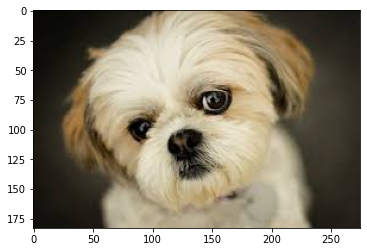

In [141]:
# Image in 3 dimensions

three_dim_image_array=Image.imread('dog.jpg')
print("----------The shape of the image is----------")
print(three_dim_image_array.shape)
print("---------The image matrix is----------")
print(three_dim_image_array)
print("----------Original Image----------")
plt.imshow(three_dim_image_array)

## AES Class

In [142]:
class AES:
    def __init__(self,key,numrounds):
        self.key=keyExpansion(key)        
        self.numrounds=numrounds

    def encrypt(self,imagepath):
        image=image_to_array(imagepath)

        #padding the image
        
        if(len(image)%16!=0):
            for i in range (0,16-len(image)%16):
                image=np.append(image,[0])

        newarray=np.zeros(image.shape,dtype=int)

        for i in tqdm.tqdm(range(0,len(image),16)):
            temp=image[i:i+16]
            temp=temp.reshape(4,4)
            temp=addRoundKey(temp,self.key[0:16].reshape(4,4))
            for j in range (1,self.numrounds):
                temp=substituteBytes(temp)
                temp=shiftRows(temp)
                temp=mixColumns(temp)
                temp=addRoundKey(temp,self.key[j*16:(j+1)*16].reshape(4,4))
            temp=substituteBytes(temp)
            temp=shiftRows(temp)
            temp=addRoundKey(temp,self.key[160:176].reshape(4,4))
            newarray[i:i+16]=temp.reshape(1,16)
        return newarray.astype(int)

    
    def decrypt(self,ciphertext):

        newarray=np.zeros(ciphertext.shape,dtype=int)
        
        for i in tqdm.tqdm(range (0,len(ciphertext),16)):
            temp=ciphertext[i:i+16]
            temp=temp.reshape(4,4)
            temp=addRoundKey(temp,self.key[160:176].reshape(4,4))
            for j in range (1,self.numrounds):
                temp=invShiftRows(temp)
                temp=invSubstituteBytes(temp)
                temp=addRoundKey(temp,self.key[(self.numrounds-j)*16:(self.numrounds-j+1)*16].reshape(4,4))
                temp=invMixColumns(temp)
            temp=invShiftRows(temp)
            temp=invSubstituteBytes(temp)
            temp=addRoundKey(temp,self.key[0:16].reshape(4,4))
            newarray[i:i+16]=temp.reshape(1,16)
        return newarray.astype(int)     

        
        
        

## Main Function

In [143]:
# For having a different key each time

keyarray=[]
for i in range (0,16):
    keyarray.append(random.randint(0,9))
aes_obj=AES(keyarray,10)
imagepath='dog.jpg'
image_encrypted_ciphertext=aes_obj.encrypt(imagepath)
image_decrypted=aes_obj.decrypt(image_encrypted_ciphertext)

ciphertext_picture=image_encrypted_ciphertext

threeDshape=Image.imread(imagepath).shape
l=threeDshape[0]
b=threeDshape[1]
h=threeDshape[2]
padlength=image_decrypted.shape[0]-l*b*h
image_decrypted_nonpadded=image_decrypted[0:image_decrypted.shape[0]-padlength]
ciphertext_picture=ciphertext_picture[0:ciphertext_picture.shape[0]-padlength]

100%|██████████| 9436/9436 [00:05<00:00, 1834.17it/s]


## CipherText After Encryption

In [144]:
print("----------Ciphertext after Encryption----------")
print(image_encrypted_ciphertext)

----------Ciphertext after Encryption----------
[142 231 195 ... 233 102 176]


## Plaintext After Decryption

In [145]:
print("----------Plaintext after Decryption----------")
print(image_decrypted)
print("----------Non padded Plaintext----------")
print (image_decrypted_nonpadded)

----------Plaintext after Decryption----------
[ 9  8  4 ... 27 21  0]
----------Non padded Plaintext----------
[ 9  8  4 ... 32 27 21]


## Image After Encryption

----------Image after Encryption----------


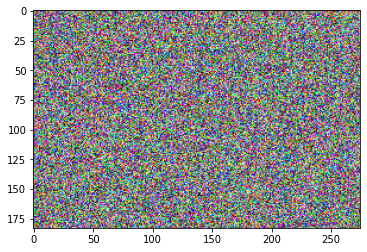

In [146]:
# image after encryption 
print("----------Image after Encryption----------")
plt.imshow(array_to_image(ciphertext_picture,l,b,h))

## Image After Decryption

----------Image after Decryption----------


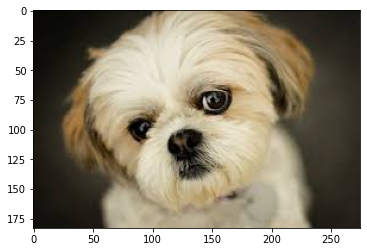

In [147]:
# image after decryption
print("----------Image after Decryption----------")
plt.imshow(array_to_image(image_decrypted_nonpadded,l,b,h))